Anotaciones:

SolutionID:
Cuando lo lanzas, le das al verde

CaseID:
En cada results solo hay un CaseID por solutionID, coge la mas reciente

NodeID:
5: modelo Global, 1: Algeciras, 2: Huelva, 3: Asesa, 4: Factorias
Compras 5 = Suma compras 1,2,3,4
Ventas 5 = Suma ventas 1,2,3,4

ColumnName:
PURC: Purchase

Se limitan los crudos min 0,1 y maximo 0,2 para ver el marginal

In [1]:
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc

# Read excel/access

In [2]:
# excel = r"C:\Users\JESCOBARO\Desktop\GlobalModel_CEPSA_2.12\Algeciras\Algeciras.xlsx"
# hoja = "BUY"

# crudos = pd.read_excel(excel, sheet_name=hoja, header=5)

# for col in list(crudos.columns):
#     if crudos[col].notnull().sum() == 0:
#         crudos.drop([col], axis=1, inplace=True)

# crudos = crudos[["pre-loss", "post-loss", "Unnamed: 10"]]
# crudos = crudos.rename(columns={'Unnamed: 10': 'nombre_crudo'})
# crudos = crudos[crudos["nombre_crudo"].notnull()]

# print(crudos.shape)
# crudos.head()

(143, 3)


,pre-loss,post-loss,nombre_crudo
1,AO0,ABO,ABO
2,AG0,AGB,AGBAMI
3,AK0,AJE,AJE
4,AP0,AKP,AKPO
5,AJ0,ALJ,AL JURF


In [2]:
excel = r"C:\Users\JESCOBARO\Desktop\GlobalModel_CEPSA_2.12\Familias2020SpiralCrudeSDK.xlsm"
hoja = "CodigosCrudos"

crudos = pd.read_excel(excel, sheet_name=hoja, header=11)

for col in list(crudos.columns):
    if crudos[col].notnull().sum() == 0:
        crudos.drop([col], axis=1, inplace=True)

crudos = crudos[["TAG", "NAME", "PIMS", "Sin mermas",
                "API", "%S", "BTM", "Familia + IMO",
                "country", "region", "% S FV 550+",
                "% FV 550+"]]
crudos = crudos[crudos["Familia + IMO"].notnull()]
crudos = crudos[crudos["Sin mermas"].notnull()]

print(crudos.shape)
display(crudos.head())
display(crudos.tail())

(148, 12)


,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
0,ABO,ABO,ABO,AO0,40.700000,0.098,7.671966,Light Sweet IMO,Nigeria,West Africa,0.602115,4.456729
1,AGB,AGBAMI,AGB,AG0,48.277746,0.043,8.009575,Light Sweet IMO,Nigeria,West Africa,0.408575,2.426031
2,AJE,AJE,AJE,AK0,41.500000,0.034,7.707608,Light Sweet IMO,Nigeria,West Africa,0.171483,3.520288
3,AKP,AKPO,AKP,AP0,45.800000,0.073,7.899185,Light Sweet IMO,Nigeria,West Africa,0.488321,4.230514
4,ALJ,AL JURF,ALJ,AJ0,29.820000,1.900,7.187234,High Sulphur,Libya,Mediterranean,4.174994,21.863008


,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
143,ZAR,ZARZAITINE,ZAR,ZT0,43.965444,0.077,7.817451,Light Sweet IMO,Libya,Mediterranean,0.274827,9.150531
144,ZUE,ZUEITINA,ZUE,ZU0,41.300000,0.280,7.698698,Light Sweet,Libya,Mediterranean,0.926068,10.815825
151,BOS,Boscan,BOS,BC0,10.300000,5.100,6.317566,Asfáltico,Venezuela,South America,NaN,NaN
152,PER,Peregrino,PER,PG0,13.700000,1.760,6.469045,Asfáltico,Brasil,South America,NaN,NaN
153,ROS,Rospo Mare,ROS,RO0,12.200000,6.120,6.402216,Asfáltico,Italia,Europe/Russia,NaN,NaN


In [3]:
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\JESCOBARO\Desktop\PIMS\2020_12_01_V4-01_January_Results.mdb;')
cursor = conn.cursor()
cursor.execute('SELECT * FROM RW_PrimalColumn')

x = (cursor.description)

class CursorByName():
    def __init__(self, cursor):
        self._cursor = cursor
    
    def __iter__(self):
        return self

    def __next__(self):
        row = self._cursor.__next__()

        return { description[0]: row[col] for col, description in enumerate(self._cursor.description) }

print(CursorByName(cursor))    
    
df_primalcolumn = pd.DataFrame(CursorByName(cursor))

# Solucion, fecha
cursor.execute('SELECT * FROM PrSolution')

df_prsolution = pd.DataFrame(CursorByName(cursor))

# Descripccion Casos, Funcion objetivo
cursor.execute('SELECT * FROM PrCase')

df_prcase = pd.DataFrame(CursorByName(cursor))

# for row in CursorByName(cursor):
#     print(row)
    
conn.close()

display(df_primalcolumn.head(3))
display(df_prsolution.head(3))
display(df_prcase.head(3))

,SolutionID,CaseID,PeriodID,NodeID,SequenceID,ColumnName,Status,Activity,Cost,LoBound,HiBound,MarginalValue
0,660154422,306,0,5,26241,PURCOB0,BS,0.2,-373.765381,0.0,NaN,0.0
1,660154422,306,0,5,26238,PURCOK0,BS,0.2,-366.603241,0.0,130.0,0.0
2,660154422,306,0,5,26242,PURCOL0,BS,0.2,-361.245728,0.0,NaN,0.0


,SolutionID,SystemVersion,DateTime,Description,ModelID,CompanyName,UserName,MachineName
0,660147211,19.10.50,2020-12-01 14:15:05,None,5,"Copyright © 1985-2017 Aspen Technology, Inc.",OFISERVER\GHERMIDA,CND8203V8D.CEPSACORP.ES
1,660154422,19.10.50,2020-12-01 16:16:17,None,5,"Copyright © 1985-2017 Aspen Technology, Inc.",OFISERVER\GHERMIDA,CND8203V8D.CEPSACORP.ES
2,660154783,19.10.50,2020-12-01 16:22:23,None,5,"Copyright © 1985-2017 Aspen Technology, Inc.",OFISERVER\GHERMIDA,CND8203V8D.CEPSACORP.ES


,SolutionID,CaseID,Description,ObjectiveFunction,SolutionStatus,Passes,PropOutofTolerance,DistrOutofTolerance,SolveTime,TotalTime,...,NOTE13,NOTE14,NOTE15,NOTE16,NOTE17,NOTE18,NOTE19,NOTE20,MODIFIES,LimitedByMinMax
0,660147211,10,Case 1: Sensibilidad al SB0,100133.351562,1,32,0,0,0,90,...,None,None,None,None,None,None,None,None,1,0
1,660154422,306,Enero Azeri a 20,100504.687500,1,30,0,0,0,115,...,None,None,None,None,None,None,None,None,1,0
2,660154422,305,Enero Azeri a 30,100423.046875,1,25,0,0,0,123,...,None,None,None,None,None,None,None,None,1,0


In [4]:
# Filtrado de columnas

# ================================================================================

df_primal = df_primalcolumn.copy()
df_primal = df_primal[["SolutionID", "CaseID", "ColumnName", "Activity"]]

# Submodelo, 4 letras
df_primal["Submodel"] = df_primal["ColumnName"].str[0:4]
#print(df_prueba["Submodel"].unique())

# Crudo
df_primal["Crudo"] = df_primal["ColumnName"].str[-4:-1]
#print(df_prueba["Crudo"].unique())

# Refineria, ultima letra A y H
df_primal["Refineria"] = df_primal["ColumnName"].str[-1:]
#print(df_prueba["Refineria"].unique())

# Filtro por Algeciras y Huelva
df_primal = df_primal[df_primal["Refineria"].isin(["A", "H"])]

# Algeciras submodels Crudo 1, Crudo 3 y C1 Lubes, C3 Lubes
submodelos_algeciras = ["SCD1", "SCD2", "SCD3", "SCD4", 
                        "SCDa", "SCDb", "SCDc", "SCDd",
                       "SCDy", "SCDi"]

# Huelva submodels Crudo 1, Crudo 2 y C1 Asfaltos, C2 Asfaltos
submodelos_huelva = ["CD1", "CD2", "CD3", 
                     "CDa", "CDb", "CDc",
                     "CD5", "CDe"]

df_primal = df_primal.loc[df_primal["Submodel"].isin(submodelos_algeciras)]

# ================================================================================
# ================================================================================

df_sol = df_prsolution.copy()
df_sol = df_sol[["SolutionID", "DateTime", "ModelID"]]

# Fecha
df_sol["DateTime"] = pd.to_datetime(df_sol["DateTime"], format='%Y%m%d %H%M%S')

# ================================================================================
# ================================================================================

df_case = df_prcase.copy()
df_case = df_case[["SolutionID", "CaseID", "Description", "ObjectiveFunction", "TotalTime"]]

# ================================================================================

display(df_primal.head(3))
display(df_sol.head(3))
display(df_case.head(3))

,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria
1890,660154422,306,SCD11L1A,0.053589,SCD1,1L1,A
1891,660154422,306,SCD11P1A,0.094450,SCD1,1P1,A
1892,660154422,306,SCD11V1A,0.152386,SCD1,1V1,A


,SolutionID,DateTime,ModelID
0,660147211,2020-12-01 14:15:05,5
1,660154422,2020-12-01 16:16:17,5
2,660154783,2020-12-01 16:22:23,5


,SolutionID,CaseID,Description,ObjectiveFunction,TotalTime
0,660147211,10,Case 1: Sensibilidad al SB0,100133.351562,90
1,660154422,306,Enero Azeri a 20,100504.687500,115
2,660154422,305,Enero Azeri a 30,100423.046875,123


# Merge

In [5]:
# Merge Rw_Primalcolumn con Prsolution

df_merge = df_primal.merge(df_sol, how="left", on = "SolutionID")

# Merge con PrCase

df_merge["Solution_Case"] = df_merge["SolutionID"].astype(str) + "_" + df_merge["CaseID"].astype(str)
df_case["Solution_Case"] = df_case["SolutionID"].astype(str) + "_" + df_case["CaseID"].astype(str)

df_merge = df_merge.merge(df_case, how="left", on = "Solution_Case")

# Merge con info crudos

df_merge = df_merge.merge(crudos, how="left", left_on = "Crudo", right_on = "PIMS")
df_merge = df_merge[df_merge["NAME"].notnull()]

# Drop y rename
drop_columns = ["SolutionID_y", "CaseID_y"]
df_merge = df_merge.drop(columns=drop_columns)
df_merge = df_merge.rename(columns={"SolutionID_x": "SolutionID", "CaseID_x": "CaseID"})


pd.set_option('display.max_columns', None)
display(df_merge.shape)
display(df_merge.dtypes)
display(df_merge.head(3))
pd.reset_option('display.max_columns')

(45175, 25)

SolutionID                    int64
CaseID                        int64
ColumnName                   object
Activity                    float64
Submodel                     object
Crudo                        object
Refineria                    object
DateTime             datetime64[ns]
ModelID                       int64
Solution_Case                object
Description                  object
ObjectiveFunction           float64
TotalTime                     int64
TAG                          object
NAME                         object
PIMS                         object
Sin mermas                   object
API                         float64
%S                          float64
BTM                         float64
Familia + IMO                object
country                      object
region                       object
% S FV 550+                  object
% FV 550+                   float64
dtype: object

,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,Description,ObjectiveFunction,TotalTime,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
10,660154422,306,SCD1ALJA,0.0,SCD1,ALJ,A,2020-12-01 16:16:17,5,660154422_306,Enero Azeri a 20,100504.6875,115,ALJ,AL JURF,ALJ,AJ0,29.82,1.900,7.187234,High Sulphur,Libya,Mediterranean,4.174994,21.863008
13,660154422,306,SCD1ARLA,0.0,SCD1,ARL,A,2020-12-01 16:16:17,5,660154422_306,Enero Azeri a 20,100504.6875,115,ARL,ARABIA LIGERO,ARL,AR0,32.95,2.007,7.326683,High Sulphur,Saudi Arabia,Middle East,4.534699,21.252828
14,660154422,306,SCD1ARMA,0.0,SCD1,ARM,A,2020-12-01 16:16:17,5,660154422_306,Enero Azeri a 20,100504.6875,115,ARM,ARABIA MEDIO,ARM,AM0,31.06,2.500,7.242479,High Sulphur,Saudi Arabia,Middle East,5.393416,25.878289


In [7]:
df_merge.to_csv("df_merge_2020_12_01_V4-01_January_Results.csv", index=False)

# Estudio

## Read csv y creado dfs

In [10]:
df_merge = pd.read_csv('df_merge_2020_12_01_V4-01_January_Results.csv') 
display(df_merge.shape)
display(df_merge.head(3))

(45175, 25)

,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,...,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
0,660154422,306,SCD1ALJA,0.0,SCD1,ALJ,A,2020-12-01 16:16:17,5,660154422_306,...,ALJ,AJ0,29.82,1.900,7.187234,High Sulphur,Libya,Mediterranean,4.174994,21.863008
1,660154422,306,SCD1ARLA,0.0,SCD1,ARL,A,2020-12-01 16:16:17,5,660154422_306,...,ARL,AR0,32.95,2.007,7.326683,High Sulphur,Saudi Arabia,Middle East,4.534699,21.252828
2,660154422,306,SCD1ARMA,0.0,SCD1,ARM,A,2020-12-01 16:16:17,5,660154422_306,...,ARM,AM0,31.06,2.500,7.242479,High Sulphur,Saudi Arabia,Middle East,5.393416,25.878289


In [30]:
pd.set_option('display.max_rows', None)

df_opciones = df_merge[["SolutionID", "CaseID", "Description", "DateTime", "Solution_Case"]].sort_values(by="DateTime", ascending=True)
df_opciones = df_opciones.drop_duplicates(subset=['Solution_Case'], keep='last').reset_index(drop=True)
display(df_opciones)

pd.reset_option('display.max_rows')

,SolutionID,CaseID,Description,DateTime,Solution_Case
0,660147211,10,Case 1: Sensibilidad al SB0,2020-12-01 14:15:05,660147211_10
1,660154422,301,Enero Azeri a 70,2020-12-01 16:16:17,660154422_301
2,660154422,307,Enero Azeri a 10,2020-12-01 16:16:17,660154422_307
3,660154422,303,Enero Azeri a 50,2020-12-01 16:16:17,660154422_303
4,660154422,306,Enero Azeri a 20,2020-12-01 16:16:17,660154422_306
5,660154422,304,Enero Azeri a 40,2020-12-01 16:16:17,660154422_304
6,660154422,305,Enero Azeri a 30,2020-12-01 16:16:17,660154422_305
7,660154422,302,Enero Azeri a 60,2020-12-01 16:16:17,660154422_302
8,660154783,312,Enero Saharan a 60,2020-12-01 16:22:23,660154783_312
9,660154783,311,Enero Saharan a 70,2020-12-01 16:22:23,660154783_311


In [11]:
soluciones = list(df_merge.Solution_Case.unique())

print(soluciones)

lista_df = []

for sol in soluciones:
    globals()["df_" + sol] = df_merge.loc[df_merge["Solution_Case"] == sol]
    lista_df.append(globals()["df_" + sol])

lista_df[1].head(3)

['660154422_306', '660154422_303', '660147211_10', '660154422_305', '660154422_302', '660154422_304', '660154422_307', '660154422_301', '660154783_315', '660154783_316', '660154783_317', '660154783_313', '660154783_314', '660154783_311', '660154783_312', '660297964_2', '660302506_126', '660249854_1', '660250152_107', '660250152_104', '660250152_102', '660250152_106', '660250152_101', '660250152_108', '660250152_103', '660250152_105', '660250152_109', '660250152_111', '660250152_110', '660250152_114', '660250152_115', '660250152_112', '660250152_113', '660250152_116', '660250152_119', '660250152_117', '660250152_118', '660250152_123', '660250152_120', '660250152_121', '660250152_122', '660250152_124', '660250152_125', '660250152_127', '660250152_129', '660250152_128', '660250152_130', '660250152_131', '660250152_132', '660250152_134', '660250152_135', '660250152_133', '660250152_136', '660250152_138', '660250152_137']


,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,...,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
345,660154422,303,SCD1ESSH,0.0,SCD1,ESS,H,2020-12-01 16:16:17,5,660154422_303,...,ESS,ES0,36.6,0.400,7.489300,Heavy Sweet,Libya,Mediterranean,1.013719,16.664312
346,660154422,303,SCD1FLGH,0.0,SCD1,FLG,H,2020-12-01 16:16:17,5,660154422_303,...,FLG,FL0,36.4,0.656,7.480390,High Sulphur,United Kingdom,Europe/Russia,1.809395,15.476747
347,660154422,303,SCD1FOBH,0.0,SCD1,FOB,H,2020-12-01 16:16:17,5,660154422_303,...,FOB,FT0,38.7,0.789,7.582861,High Sulphur,United Kingdom,Europe/Russia,2.639904,13.681658


In [18]:
pd.set_option('display.max_columns', None)

seleccion = "df_" + "660249854_1"
df_caso = df_660249854_1.copy()
df_caso.head(3)

,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,Description,ObjectiveFunction,TotalTime,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
13901,660249854,1,SCD1ALJA,0.0,SCD1,ALJ,A,2020-12-02 18:46:03,5,660249854_1,JAN21M3,102705.46875,101,ALJ,AL JURF,ALJ,AJ0,29.82,1.900,7.187234,High Sulphur,Libya,Mediterranean,4.174994,21.863008
13902,660249854,1,SCD1ARLA,0.0,SCD1,ARL,A,2020-12-02 18:46:03,5,660249854_1,JAN21M3,102705.46875,101,ARL,ARABIA LIGERO,ARL,AR0,32.95,2.007,7.326683,High Sulphur,Saudi Arabia,Middle East,4.534699,21.252828
13903,660249854,1,SCD1ARMA,0.0,SCD1,ARM,A,2020-12-02 18:46:03,5,660249854_1,JAN21M3,102705.46875,101,ARM,ARABIA MEDIO,ARM,AM0,31.06,2.500,7.242479,High Sulphur,Saudi Arabia,Middle East,5.393416,25.878289


,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,Description,ObjectiveFunction,TotalTime,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
13970,660249854,1,SCD2BONA,33.650246,SCD2,BON,A,2020-12-02 18:46:03,5,660249854_1,JAN21M3,102705.46875,101,BON,BONGA,BON,BO0,27.700000,0.254,7.092782,High Density Sweet IMO,Nigeria,West Africa,0.657448,11.076281
13993,660249854,1,SCD2ESCA,204.922211,SCD2,ESC,A,2020-12-02 18:46:03,5,660249854_1,JAN21M3,102705.46875,101,ESC,Escravos,ESC,EV0,32.208846,0.174,7.293663,Light Sweet IMO,Nigeria,West Africa,0.465559,9.965741
14120,660249854,1,SCDbAGBA,60.331844,SCDb,AGB,A,2020-12-02 18:46:03,5,660249854_1,JAN21M3,102705.46875,101,AGB,AGBAMI,AGB,AG0,48.277746,0.043,8.009575,Light Sweet IMO,Nigeria,West Africa,0.408575,2.426031


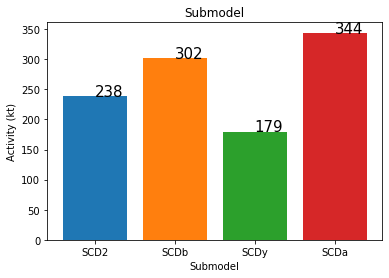

In [17]:
# Se limitan los crudos min 0,1 y maximo 0,2 para ver el marginal, filtramos > 0.2

df_plot = df_caso.loc[df_caso["Activity"] > 0.2]

display(df_plot.head(3))

# df_caso.barh("Activity", bins=30, edgecolor= 'black', alpha=0.5, label="Activity")

submodels = df_plot["Submodel"].unique()

fig, ax = plt.subplots()
for sub in submodels:
    ax.bar(sub, df_plot[df_plot["Submodel"] == sub]["Activity"].sum())
    posicion_y = df_plot[df_plot["Submodel"] == sub]["Activity"].sum()
    posicion_x = sub
    ax.text(posicion_x, posicion_y, int(posicion_y), fontsize = 15)

ax.set_title("Submodel")   
ax.set_xlabel("Submodel")
ax.set_ylabel("Activity (kt)")
# Aumentar rango eje X para cuadrar etiquetas
# ==============================================================================
# plt.xlim(0, 1100)
plt.show();

(2791, 10)
Total Cases =  7
Avg Activity =  6.628129228550408


,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,pre-loss,post-loss,nombre_crudo
10,660154422,306,SCD1ALJA,0.00000,SCD1,ALJ,A,AJ0,ALJ,AL JURF
11,660154422,306,SCD1ANTA,0.00000,SCD1,ANT,A,AN0,ANT,ANTAN
13,660154422,306,SCD1ARLA,0.00000,SCD1,ARL,A,AR0,ARL,ARABIA LIGERO
14,660154422,306,SCD1ARMA,0.00000,SCD1,ARM,A,AM0,ARM,ARABIA MEDIO
15,660154422,306,SCD1BALA,0.19998,SCD1,BAL,A,BA0,BAL,BASRA LIGERO
...,...,...,...,...,...,...,...,...,...,...
4403,660154422,301,SCD3YOHH,0.00000,SCD3,YOH,H,YO0,YOH,YOHO
4404,660154422,301,SCD3ZABH,0.00000,SCD3,ZAB,H,ZA0,ZAB,ZAFIRO BLEND
4405,660154422,301,SCD3ZAEH,0.00000,SCD3,ZAE,H,ZI0,ZAE,ZAIRE EXPORT
4406,660154422,301,SCD3ZARH,0.00000,SCD3,ZAR,H,ZT0,ZAR,ZARZAITINE


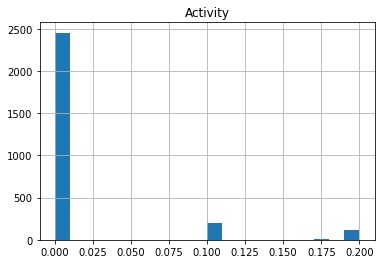

In [54]:
df_caso = lista_df[0].copy()

df_caso = df_caso.loc[df_caso["Activity"] <= 0.2]

print(df_caso.shape)
print("Total Cases = ", len(df_caso.CaseID.unique()))
print("Avg Activity = ", df_caso.Activity.sum()/len(df_caso.CaseID.unique()))
display(df_caso)

df_caso.hist("Activity", bins=20)
plt.show();

(12, 19)
Total Cases =  1
Avg Activity =  787.2244010865688


,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
17242,660297964,2,SCD2AMBA,129.887009,SCD2,AMB,A,AMB,AMENAM BLEND,AMB,AB0,38.980000,0.090,7.595336,Light Sweet IMO,Nigeria,West Africa,0.179659,6.087387
17279,660297964,2,SCD2ESCA,43.297016,SCD2,ESC,A,ESC,Escravos,ESC,EV0,32.208846,0.174,7.293663,Light Sweet IMO,Nigeria,West Africa,0.465559,9.965741
17297,660297964,2,SCD2IRAA,28.088772,SCD2,IRA,A,IRA,IRACEMA,IRA,IC0,32.712405,0.280,7.316098,Heavy Sweet IMO,Brazil,South America,0.620789,21.861522
17498,660297964,2,SCDbBONA,129.887009,SCDb,BON,A,BON,BONGA,BON,BO0,27.700000,0.254,7.092782,High Density Sweet IMO,Nigeria,West Africa,0.657448,11.076281
17517,660297964,2,SCDbEGIA,72.351562,SCDb,EGI,A,EGI,EGINA,EGI,EG0,27.292038,0.165,7.074606,Heavy Sweet IMO,Nigeria,West Africa,0.474925,10.505924
17521,660297964,2,SCDbESCA,14.574535,SCDb,ESC,A,ESC,Escravos,ESC,EV0,32.208846,0.174,7.293663,Light Sweet IMO,Nigeria,West Africa,0.465559,9.965741
17680,660297964,2,SCDyARLA,102.610283,SCDy,ARL,A,ARL,ARABIA LIGERO,ARL,AR0,32.950000,2.007,7.326683,High Sulphur,Saudi Arabia,Middle East,4.534699,21.252828
19199,660297964,2,SCDaEGIH,57.583557,SCDa,EGI,H,EGI,EGINA,EGI,EG0,27.292038,0.165,7.074606,Heavy Sweet IMO,Nigeria,West Africa,0.474925,10.505924
19221,660297964,2,SCDaJONH,77.346916,SCDa,JON,H,JON,JONES CREEK,JON,JO0,29.800000,0.183,7.186342,Heavy Sweet IMO,Nigeria,West Africa,0.487519,10.432205
19244,660297964,2,SCDaOKOH,1.384978,SCDa,OKO,H,OKO,OKONO,OKO,OK0,40.501243,0.062,7.663111,Light Sweet IMO,Nigeria,West Africa,0.310856,1.853130


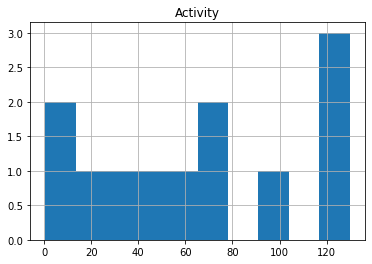

In [31]:
df_caso = lista_df[3].copy()

df_caso = df_caso.loc[df_caso["Activity"] > 0.2]

print(df_caso.shape)
print("Total Cases = ", len(df_caso.CaseID.unique()))
print("Avg Activity = ", df_caso.Activity.sum()/len(df_caso.CaseID.unique()))
display(df_caso)

df_caso.hist("Activity")
plt.show();

% familia crudo en cada submodelo

